# Dimension Reduction(PCA、Kernel PCA)

データ構造が線形な場合　→　PCA  
データ構造が非線形な場合　→　Kernel PCA

参考 :  
PCA : http://neuro-educator.com/ml21/  
Kernel PCA : http://neuro-educator.com/ml22/  

In [1]:
# 1：ライブラリのインポート--------------------------------
import numpy as np #numpyという行列などを扱うライブラリを利用
import pandas as pd #pandasというデータ分析ライブラリを利用
import matplotlib.pyplot as plt #プロット用のライブラリを利用
from sklearn import cross_validation, preprocessing, decomposition #機械学習用のライブラリを利用

/Users/mitsuhiro/.pyenv/versions/anaconda3-4.1.1/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# 2：Wineのデータセットを読み込む--------------------------------
df_wine_all=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
#品種(0列、1～3)と色（10列）とプロリンの量(13列)を使用する
X=df_wine_all.iloc[:,1:].values
Y=df_wine_all.iloc[:,0].values

<function matplotlib.pyplot.show>

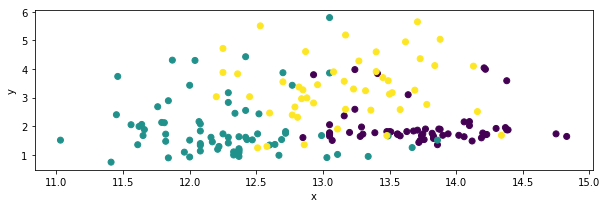

In [3]:
# 3：プロットする
%matplotlib inline
 
plt.figure(figsize=(10,10))
plt.subplot(3, 1, 1)
plt.scatter(X[:,0],X[:,1], c=Y)
plt.xlabel('x')
plt.ylabel('y')
plt.show

---

# PCA(Princial Component Analysis)

PCAに関してはこちらを参考  
https://logics-of-blue.com/principal-components-analysis/  
データのばらつき、すなわち分散を最大にするように線を引く

In [18]:
# 3：データの整形-------------------------------------------------------
sc=preprocessing.StandardScaler()
sc.fit(X)
X=sc.transform(X)

In [19]:
 # 4：主成分分析を実施-------------------------------
pca = decomposition.PCA(n_components=2) # 
X_transformed = pca.fit_transform(X)

In [20]:
# 5: 主成分分析の結果-----------------------------
print("主成分の分散説明率")
print(pca.explained_variance_ratio_) 
print("固有ベクトル")
print(pca.components_)

主成分の分散説明率
[ 0.36198848  0.1920749 ]
固有ベクトル
[[ 0.1443294  -0.24518758 -0.00205106 -0.23932041  0.14199204  0.39466085
   0.4229343  -0.2985331   0.31342949 -0.0886167   0.29671456  0.37616741
   0.28675223]
 [-0.48365155 -0.22493093 -0.31606881  0.0105905  -0.299634   -0.06503951
   0.00335981 -0.02877949 -0.03930172 -0.52999567  0.27923515  0.16449619
  -0.36490283]]


詳しい使い方はこちら:  
http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA

<function matplotlib.pyplot.show>

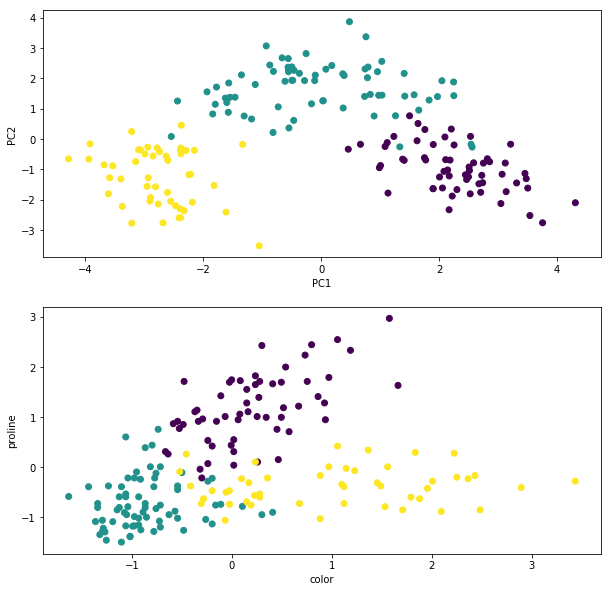

In [21]:
# 6：プロットする
%matplotlib inline
 
plt.figure(figsize=(10,10))
plt.subplot(2, 1, 1)
plt.scatter(X_transformed[:,0],X_transformed[:,1], c=Y)
plt.xlabel('PC1')
plt.ylabel('PC2')
 
plt.subplot(2, 1, 2)
plt.scatter(X[:,9],X[:,12], c=Y)
plt.xlabel('color')
plt.ylabel('proline')
plt.show

# Kernel PCA

Kernelに関してはClassification1を参考

In [29]:
# 3：データの整形-------------------------------------------------------
sc=preprocessing.StandardScaler()
sc.fit(X)
X=sc.transform(X)

In [32]:
# 4：主成分分析を実施-------------------------------
pca = decomposition.PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [55]:
# 解説5：カーネル主成分分析を実施-------------------------------
kpca = decomposition.KernelPCA(kernel='rbf', gamma=0.5)
X_kpca = kpca.fit_transform(X)

詳しい使い方はこちら  
http://scikit-learn.org/stable/modules/decomposition.html#principal-component-analysis-pca

<function matplotlib.pyplot.show>

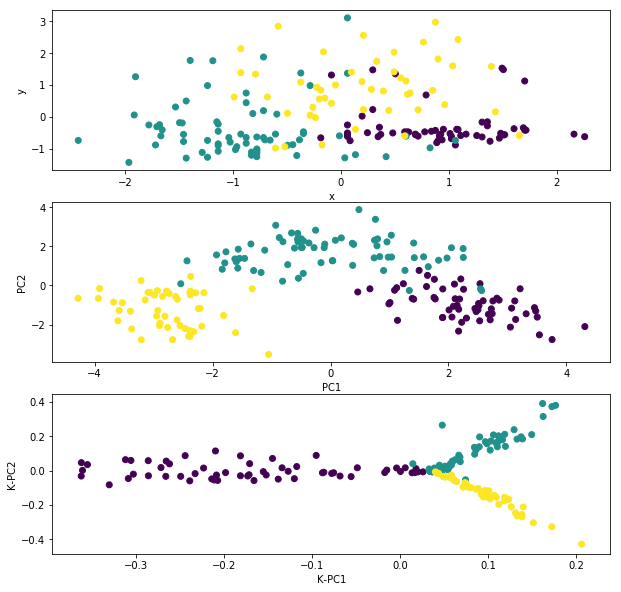

In [56]:
# 6: 結果をプロットする-----------------------------
%matplotlib inline
 
plt.figure(figsize=(10,10))
plt.subplot(3, 1, 1)
plt.scatter(X[:,0],X[:,1], c=Y)
plt.xlabel('x')
plt.ylabel('y')
 
plt.subplot(3, 1, 2)
plt.scatter(X_pca[:,0],X_pca[:,1], c=Y)
plt.xlabel('PC1')
plt.ylabel('PC2')
 
plt.subplot(3, 1, 3)
plt.scatter(X_kpca[:,0],X_kpca[:,1], c=Y)
plt.xlabel('K-PC1')
plt.ylabel('K-PC2')
 
plt.show

---

# Kernel PCAしか無理な場合（非線形データ）

In [57]:
# 1：ライブラリのインポート--------------------------------
import numpy as np #numpyという行列などを扱うライブラリを利用
import pandas as pd #pandasというデータ分析ライブラリを利用
import matplotlib.pyplot as plt #プロット用のライブラリを利用
from sklearn import cross_validation, preprocessing, decomposition #機械学習用のライブラリを利用
from sklearn import datasets #使用するデータ
 
# 2：moon型のデータを読み込む--------------------------------
X,Y = datasets.make_moons(n_samples=200, noise=0.05, random_state=0)

In [58]:
# 3：データの整形-------------------------------------------------------
sc=preprocessing.StandardScaler()
sc.fit(X)
X_norm=sc.transform(X)

In [59]:
# 4：主成分分析を実施-------------------------------
pca = decomposition.PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [60]:
# 解説5：カーネル主成分分析を実施-------------------------------
kpca = decomposition.KernelPCA(n_components=2,  kernel='rbf', gamma=20.0)
X_kpca = kpca.fit_transform(X)

<function matplotlib.pyplot.show>

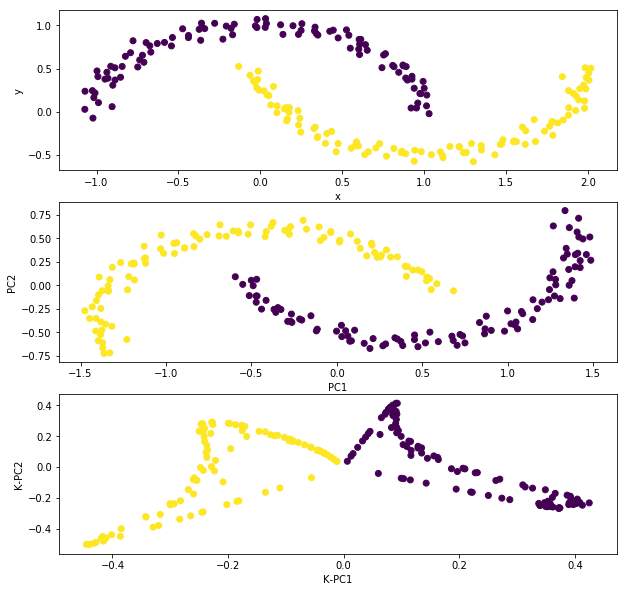

In [61]:
# 6: 結果をプロットする-----------------------------
%matplotlib inline
 
plt.figure(figsize=(10,10))
plt.subplot(3, 1, 1)
plt.scatter(X[:,0],X[:,1], c=Y)
plt.xlabel('x')
plt.ylabel('y')
 
plt.subplot(3, 1, 2)
plt.scatter(X_pca[:,0],X_pca[:,1], c=Y)
plt.xlabel('PC1')
plt.ylabel('PC2')
 
plt.subplot(3, 1, 3)
plt.scatter(X_kpca[:,0],X_kpca[:,1], c=Y)
plt.xlabel('K-PC1')
plt.ylabel('K-PC2')
 
plt.show

上から元データ、PCA、Kernel PCA  
元データからわかるように線形には判別できない非線形なデータ構造  
PCAの結果からわかるように元データとそれほど結果が変わっておらず、機能していない  
最後にKernel PCAを実施したのが、一番下のグラフ  
データ構造がより分かりやすいように、新たな軸が作られていることが分かる  